In [144]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection

import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df["high_bmi"] = np.where(df.bmi > 30, 1, 0)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,high_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [21]:
#df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/insurance.csv")
df["high_bmi"] = np.where(df.bmi > 30, 1, 0)
X = df.copy()
del X["charges"]
X = pd.get_dummies(X, drop_first=True)
X = StandardScaler().fit_transform(X)
y = df.charges

scores = cross_val_score(cv = 10, estimator=LinearRegression(), scoring="r2", X=X, y = y)
np.mean(scores)

0.7497088844100136

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
high_bmi    1338 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.7+ KB


In [42]:
df_cat = df.select_dtypes(include=["object"])
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)

df_num = df.select_dtypes(include=["float64", "int64"])
del df_num["charges"]
columns = list(df_num.columns)
columns.extend(df_cat_dummy.columns)
print("columns:", columns )
df_num_std = StandardScaler().fit_transform(df_num)
X = np.concatenate([df_num_std, df_cat_dummy], axis = 1)
y = df.charges
scores = cross_val_score(cv = 10, estimator=LinearRegression(), scoring="r2", X=X, y = y)
np.mean(scores)

columns: ['age', 'bmi', 'children', 'high_bmi', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


0.74970888441001371

In [41]:
columns

['age',
 'bmi',
 'children',
 'high_bmi',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [36]:
from sklearn.feature_selection import f_regression

In [48]:
pvals = pd.DataFrame({"feature": columns, "pval": f_regression(X, y)[1]})
pvals.sort_values("pval")

,feature,pval
5,smoker_yes,8.2714e-283
0,age,4.8867e-29
3,high_bmi,1.6849e-13
1,bmi,2.4591e-13
7,region_southeast,6.7827e-03
2,children,1.2852e-02
4,sex_male,3.6133e-02
8,region_southwest,1.1415e-01
6,region_northwest,1.4460e-01


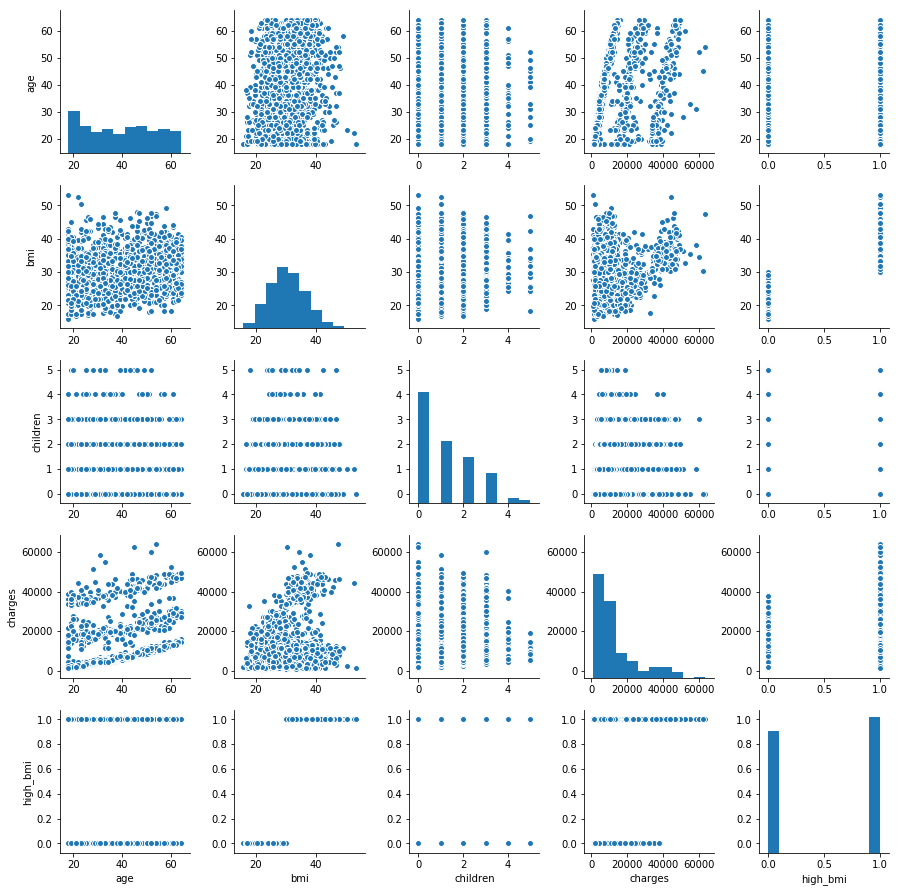

In [20]:
sns.pairplot(df)

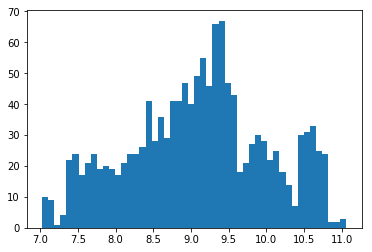

In [10]:
plt.hist(np.log(y), bins = 50);

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/Combined_Cycle_Power_Plant.csv"
        )
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [50]:
outcome = "PE"
X = df.copy()
X = X.fillna(X.mean())
del X[outcome]
X = pd.get_dummies(X, drop_first=True)
X = StandardScaler().fit_transform(X)
y = df[outcome]

scores = cross_val_score(cv = 10, estimator=LinearRegression(), scoring="r2", X=X, y = y)
np.mean(scores)

0.92865893306999359

In [51]:
outcome = "PE"
X = df.copy()
X = X.fillna(X.mean())
del X[outcome]
X = pd.get_dummies(X, drop_first=True)
X = StandardScaler().fit_transform(X)
y = df[outcome]

outcome = "PE"
X = df.copy()
X = X.fillna(X.mean())
del X[outcome]
X = pd.get_dummies(X, drop_first=True)
X = StandardScaler().fit_transform(X)
y = df[outcome]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123
                                                   )

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.93048686207771569

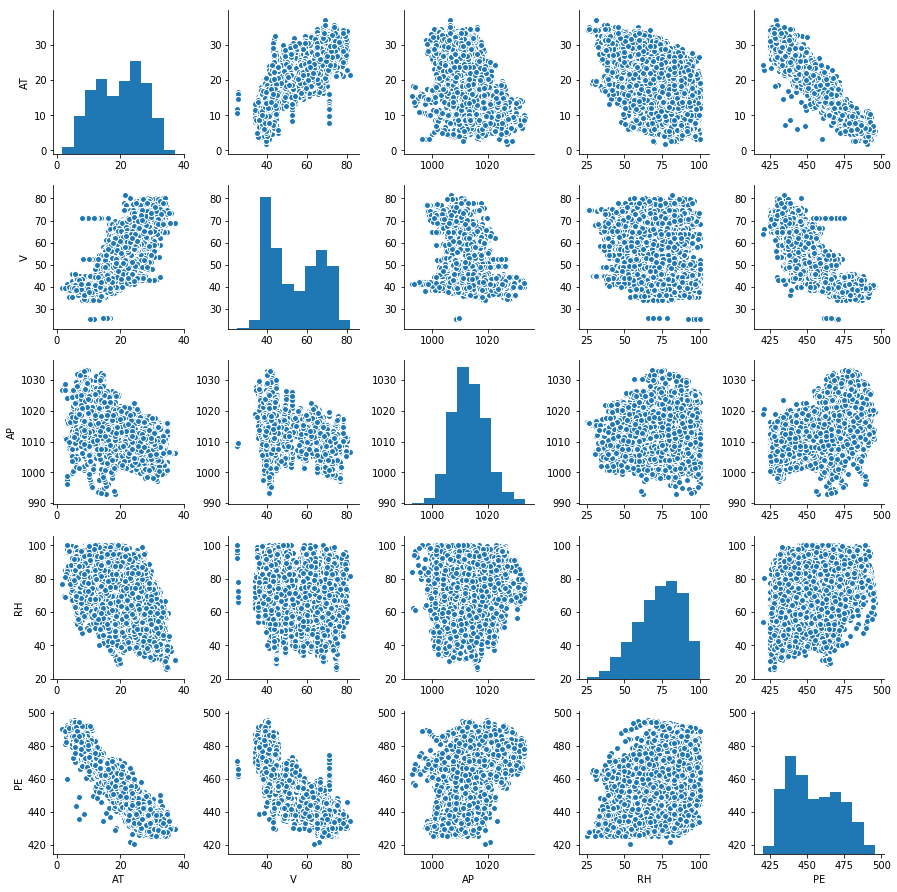

In [52]:
sns.pairplot(df)

In [72]:
outcome = "PE"
poly = PolynomialFeatures(degree=5)


X = df.copy()
X = X.fillna(X.mean())
del X[outcome]
X = pd.get_dummies(X, drop_first=True)
X = poly.fit_transform(X)
#X["V2"] = np.square(X["V"]) 
X = StandardScaler().fit_transform(X)

y = df[outcome]

scores = cross_val_score(cv = 10, estimator=LinearRegression(), scoring="r2", X=X, y = y)
np.mean(scores)

0.94578393376730518

In [73]:
X.shape

(47840, 126)

In [60]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [61]:
a = np.array([
    [2, 3, 4],
    [4, 0, 2],
    [5, 6, -1],
    [-2, 1, 0]
])
poly.fit_transform(a)

array([[  2.,   3.,   4.,   4.,   6.,   8.,   9.,  12.,  16.],
       [  4.,   0.,   2.,  16.,   0.,   8.,   0.,   0.,   4.],
       [  5.,   6.,  -1.,  25.,  30.,  -5.,  36.,  -6.,   1.],
       [ -2.,   1.,   0.,   4.,  -2.,  -0.,   1.,   0.,   0.]])

In [63]:
pd.DataFrame(poly.fit_transform(X))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.6296,-0.9873,1.8205,-0.0095,0.3963,0.6216,-1.1461,0.0060,0.9748,-1.7974,0.0094,3.3142,-0.0173,9.0618e-05
1,0.7419,0.6810,1.1419,-0.9746,0.5504,0.5053,0.8471,-0.7231,0.4638,0.7777,-0.6638,1.3039,-1.1129,9.4989e-01
2,-1.9514,-1.1730,-0.1851,1.2898,3.8078,2.2890,0.3612,-2.5169,1.3760,0.2171,-1.5130,0.0343,-0.2387,1.6637e+00
3,0.1622,0.2372,-0.5084,0.2282,0.0263,0.0385,-0.0825,0.0370,0.0563,-0.1206,0.0541,0.2585,-0.1160,5.2057e-02
4,-1.1851,-1.3225,-0.6785,1.5967,1.4045,1.5674,0.8041,-1.8923,1.7491,0.8973,-2.1117,0.4603,-1.0833,2.5494e+00
5,0.8882,0.4040,-0.1733,-0.9959,0.7888,0.3589,-0.1539,-0.8845,0.1632,-0.0700,-0.4024,0.0300,0.1726,9.9173e-01
6,-0.5048,-0.8142,0.1281,0.1323,0.2548,0.4110,-0.0647,-0.0668,0.6629,-0.1043,-0.1077,0.0164,0.0169,1.7494e-02
7,-1.3649,-0.7551,0.9869,-0.4712,1.8631,1.0307,-1.3471,0.6431,0.5702,-0.7453,0.3558,0.9741,-0.4650,2.2201e-01
8,-0.6725,-0.7323,1.4349,-2.1959,0.4523,0.4925,-0.9650,1.4767,0.5363,-1.0508,1.6081,2.0588,-3.1508,4.8220e+00
9,-1.0617,-0.8456,0.3167,-0.1773,1.1271,0.8978,-0.3363,0.1883,0.7151,-0.2678,0.1500,0.1003,-0.0562,3.1447e-02


In [93]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [152]:
if "Id" in df.columns: 
    del df["Id"]
target = "SalesPrice"
df_cat = df.select_dtypes(include=["object"])
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)

df_num = df.select_dtypes(include=["float64", "int64"])
del df_num[target]
columns = list(df_num.columns)
columns.extend(df_cat_dummy.columns)
df_num_std = StandardScaler().fit_transform(df_num)
X = np.concatenate([df_num_std, df_cat_dummy], axis = 1)
y = df[target]

X = X[~np.isnan(y)]
y = y[~np.isnan(y)]
y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

est = linear_model.Lasso(random_state=1, alpha=0.0021544346900318843, max_iter=10000)
est.fit(X_train, y_train)
print("train R2: ", est.score(X_train, y_train), 
      "test R2:", est.score(X_test, y_test))
#train R2:  0.90495661915 test R2: 0.881526276383

train R2:  0.88933381949 test R2: 0.880363409639


In [141]:
np.linspace(-5, 2, 10)

array([-5.        , -4.22222222, -3.44444444, -2.66666667, -1.88888889,
       -1.11111111, -0.33333333,  0.44444444,  1.22222222,  2.        ])

In [142]:
10 ** np.linspace(-5, 2, 10)

array([  1.00000000e-05,   5.99484250e-05,   3.59381366e-04,
         2.15443469e-03,   1.29154967e-02,   7.74263683e-02,
         4.64158883e-01,   2.78255940e+00,   1.66810054e+01,
         1.00000000e+02])

In [164]:
%%time 

param_grid = {
    #"alpha": 10 ** np.linspace(-5, 2, 10)
    "alpha": np.linspace(10, 20, 20)
}
est = linear_model.Ridge( random_state=1, max_iter=10000)
gs = model_selection.GridSearchCV(cv=10, estimator=est, verbose=True,
                                  param_grid=param_grid, scoring="r2")
gs.fit(X_train, y_train)
print(gs.best_params_, gs.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'alpha': 14.736842105263158} 0.848881306576
CPU times: user 2.45 s, sys: 47.1 ms, total: 2.5 s
Wall time: 1.3 s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


In [151]:
gs.best_estimator_.score(X_test, y_test)

0.88036340963872706

In [ ]:
 np.linspace(-5, 2)

In [133]:
set3= est.coef_

In [128]:
set1 = est.coef_

In [126]:
set2 = est.coef_

In [134]:
pd.DataFrame({"set1_alpha_nz": set1, "set2_alpha_zero": set2, "set3": set3, "col": columns})

,col,set1_alpha_nz,set2_alpha_zero,set3
0,MSSubClass,-2.6182e-02,0.0130,-0.0000
1,LotFrontage,-1.3314e-02,0.0018,0.0000
2,LotArea,1.5994e-02,0.0239,0.0000
3,OverallQual,9.1942e-02,0.0588,0.1378
4,OverallCond,4.2961e-02,0.0343,0.0000
5,YearBuilt,4.7843e-02,0.0507,0.0063
6,YearRemodAdd,1.6688e-02,0.0156,0.0000
7,MasVnrArea,-0.0000e+00,-0.0042,0.0000
8,BsmtFinSF1,-2.3414e-03,0.0390,0.0000
9,BsmtFinSF2,5.5021e-03,0.0092,0.0000


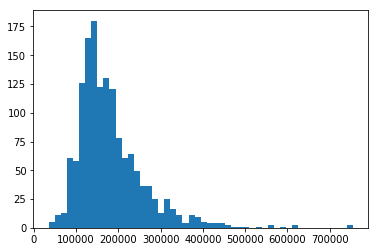

In [117]:
y = df[target]
y = y[~np.isnan(y)]
plt.hist(y, bins = 50);

In [113]:
from scipy.stats import probplot

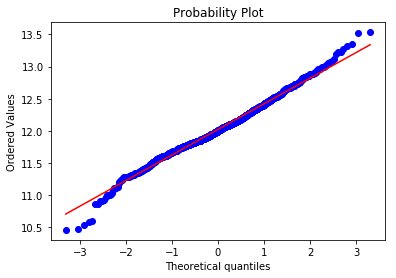

In [118]:
probplot(np.log(y), plot=plt);

In [138]:
if "Id" in df.columns: 
    del df["Id"]
target = "SalesPrice"
df_dummy = pd.get_dummies(df, drop_first=True)

del df_dummy[target]
X = StandardScaler().fit_transform(df_dummy)
y = df[target]

X = X[~np.isnan(y)]
y = y[~np.isnan(y)]
y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

est = linear_model.Lasso(random_state=1, alpha=0.01, max_iter=10000)
est.fit(X_train, y_train)
print("train R2: ", est.score(X_train, y_train), 
      "test R2:", est.score(X_test, y_test))

train R2:  0.895233391216 test R2: 0.879874492407
